In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from scipy.signal import convolve2d

In [2]:
f = imread('lena_gray.bmp')

In [3]:
f.shape

(512, 512)

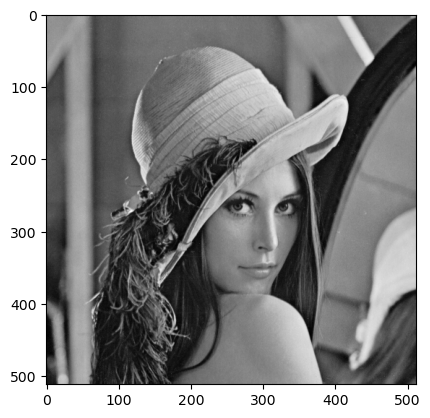

In [4]:
plt.imshow(f,cmap='gray')

## Filtro passa baixas

In [5]:
N=3
wpb = 1/(N*N) * np.ones((N,N))

In [6]:
g = convolve2d (f, wpb, mode='same')

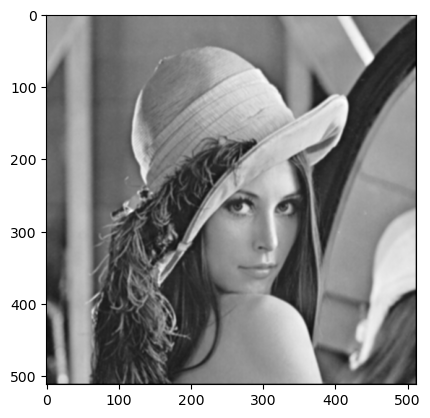

In [7]:
plt.imshow(g, cmap='gray')

In [8]:
g.shape

(512, 512)

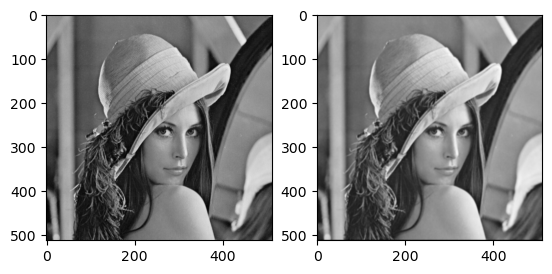

In [9]:
_,ax = plt.subplots(1,2)
ax[0].imshow(f,cmap='gray')
ax[1].imshow(g,cmap='gray')

## Filtro passa altas

In [10]:
wpa = -wpb
wpa[1,1]=8/9

In [11]:
wpa

array([[-0.11111111, -0.11111111, -0.11111111],
       [-0.11111111,  0.88888889, -0.11111111],
       [-0.11111111, -0.11111111, -0.11111111]])

In [12]:
wpa*9

array([[-1., -1., -1.],
       [-1.,  8., -1.],
       [-1., -1., -1.]])

In [13]:
g_ = convolve2d (f,wpa)

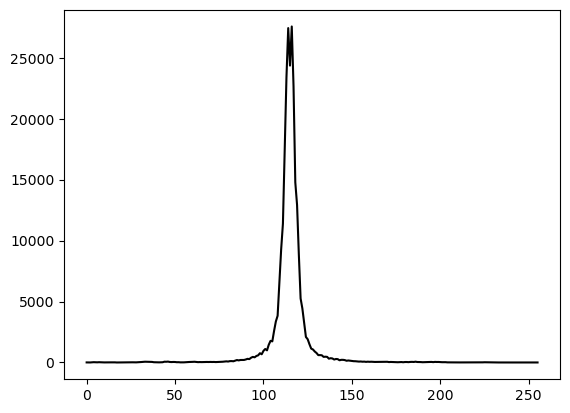

In [14]:
h,_ = np.histogram (g_, bins=256)
plt.plot (h,'-k')

In [15]:
g_.min(),g_.max()

(np.float64(-73.0), np.float64(88.77777777777777))

In [16]:
g_ = g_ - g_.min()
g_ = (g_ / g_.max()) * 255
g_ = g_.astype ('uint8')

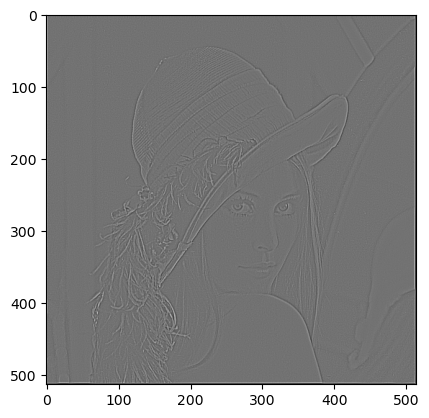

In [17]:
plt.imshow (g_, cmap= 'gray')